# Portfolio assignment 10
Perform a bivariate analysis (Pearson correlation and scatter plot) on at least 1 combination of 2 columns with numeric data in the dataset that you already used. Does the correlation and scatter plot match your expectations? Add your answer to your notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/aug_test.csv', sep=',')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,8.270.000.000.000.000,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.92,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,8.270.000.000.000.000,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


## Fixing numerical data
- Experience: total experience in years
- Last new job: difference in years between previous job and current job

### Experience

In [3]:
df['experience'].unique()

array(['9', '5', '<1', '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [4]:
# setting <1 to 0
filter1year = df['experience'] == '<1'
df.loc[filter1year, 'experience'] = 0
df['experience'].unique()

array(['9', '5', 0, '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [5]:
# setting >20 to 21
filter20year = df['experience'] == '>20'
df.loc[filter20year, 'experience'] = 21
df['experience'].unique()

array(['9', '5', 0, '11', 21, '10', '14', '3', '20', '8', '4', '13', '2',
       '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [6]:
df['experience'] = pd.to_numeric(df['experience'])
df['experience'].unique()

array([ 9.,  5.,  0., 11., 21., 10., 14.,  3., 20.,  8.,  4., 13.,  2.,
        6.,  7.,  1., 19., 15., 16., nan, 17., 18., 12.])

### Last new job

In [7]:
df['last_new_job'].unique()

array(['1', 'never', '>4', '2', '4', '3', nan], dtype=object)

In [8]:
# setting never to 0
filternever = df['last_new_job'] == 'never'
df.loc[filternever, 'last_new_job'] = 0
df['last_new_job'].unique()

array(['1', 0, '>4', '2', '4', '3', nan], dtype=object)

In [9]:
# setting >4 to 0
filter4more = df['last_new_job'] == '>4'
df.loc[filter4more, 'last_new_job'] = 5
df['last_new_job'].unique()

array(['1', 0, 5, '2', '4', '3', nan], dtype=object)

In [10]:
df['last_new_job'] = pd.to_numeric(df['last_new_job'])
df['last_new_job'].unique()

array([ 1.,  0.,  5.,  2.,  4.,  3., nan])

## Correlation

In [11]:
df.corr()

,enrollee_id,experience,last_new_job,training_hours
enrollee_id,1.000000,-0.019257,-0.048788,0.003239
experience,-0.019257,1.000000,0.477278,0.009558
last_new_job,-0.048788,0.477278,1.000000,0.017560
training_hours,0.003239,0.009558,0.017560,1.000000


In [13]:
dfCorrelations = df.corr()
dfCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,enrollee_id,experience,last_new_job,training_hours
enrollee_id,1.00,-0.02,-0.05,0.00
experience,-0.02,1.00,0.48,0.01
last_new_job,-0.05,0.48,1.00,0.02
training_hours,0.00,0.01,0.02,1.00


There are no corrleations between the attributes, the only one is between teh last new job and experience.

## Scatter plot

<AxesSubplot:xlabel='last_new_job', ylabel='experience'>

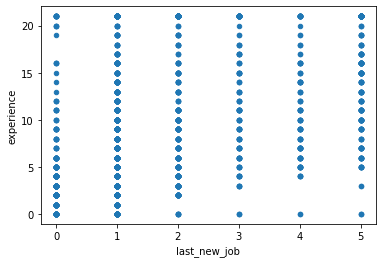

In [14]:
df.plot(kind='scatter', x='last_new_job', y='experience')

As you can see, this is still a very weak correlation.